In [2]:
import tweepy
import pandas as pd
import numpy as np

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def twitter_setup():
    
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

In [30]:
extractor = twitter_setup()
 
tweets = extractor.user_timeline(screen_name="NarendraModi", count = 5000)
print("number of tweets extracted: {}.\n".format(len(tweets)))
 
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

number of tweets extracted: 200.

5 recent tweets:

Today they are betraying the principles of Dr. Ram Manohar Lohia, tomorrow they will also betray the people of Indi… https://t.co/SWzKgB4bla

जो लोग आज डॉ. लोहिया के सिद्धांतों से छल कर रहे हैं, वही कल देशवासियों के साथ भी छल करेंगे।
 
जो लोग डॉ. लोहिया के… https://t.co/WcGGi7MzT0

Greetings to @smritiirani Ji on her birthday. She has made valuable contributions towards strengthening the BJP and… https://t.co/8M7F1UeoRH

आजादी के अमर सेनानी वीर भगत सिंह, सुखदेव और राजगुरु को शहीद दिवस पर शत-शत नमन। भारत माता के इन पराक्रमी सपूतों के… https://t.co/ke0I5TDUxe

My condolences to the family and supporters of Karnataka Minister Shri CS Shivalli. 

Shri Shivalli will be remembe… https://t.co/jOUR5kYP0O



In [31]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
 
display(data.head(10))

,tweets
0,Today they are betraying the principles of Dr....
1,जो लोग आज डॉ. लोहिया के सिद्धांतों से छल कर रह...
2,Greetings to @smritiirani Ji on her birthday. ...
3,"आजादी के अमर सेनानी वीर भगत सिंह, सुखदेव और रा..."
4,My condolences to the family and supporters of...
5,Opposition insults our forces time and again.\...
6,Opposition is the natural habitat of terror ap...
7,Loyal courtier of Congress’ royal dynasty admi...
8,The most trusted advisor and guide of the Cong...
9,वीरों और महापुरुषों की धरती बिहार के निवासियों...


In [32]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [33]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1109306402395377665
2019-03-23 04:10:30
Twitter for iPhone
20262
5397
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/SWzKgB4bla', 'expanded_url': 'https://twitter.com/i/web/status/1109306402395377665', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [34]:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [35]:
display(data.head(20))

,tweets,len,ID,Date,Source,Likes,RTs
0,Today they are betraying the principles of Dr....,140,1109306402395377665,2019-03-23 04:10:30,Twitter for iPhone,20262,5397
1,जो लोग आज डॉ. लोहिया के सिद्धांतों से छल कर रह...,139,1109306053429219329,2019-03-23 04:09:07,Twitter for iPhone,31827,8120
2,Greetings to @smritiirani Ji on her birthday. ...,140,1109274062063316992,2019-03-23 02:02:00,Twitter for iPhone,56765,9642
3,"आजादी के अमर सेनानी वीर भगत सिंह, सुखदेव और रा...",138,1109273202499436545,2019-03-23 01:58:35,Twitter Media Studio,47862,13159
4,My condolences to the family and supporters of...,140,1109069660182319105,2019-03-22 12:29:47,Twitter Web Client,38745,6256
5,Opposition insults our forces time and again.\...,139,1108965519082684416,2019-03-22 05:35:57,Twitter Web Client,57503,22999
6,Opposition is the natural habitat of terror ap...,140,1108965321434497024,2019-03-22 05:35:10,Twitter Web Client,30931,13033
7,Loyal courtier of Congress’ royal dynasty admi...,140,1108964963190628352,2019-03-22 05:33:45,Twitter Web Client,37428,16378
8,The most trusted advisor and guide of the Cong...,140,1108964730729689088,2019-03-22 05:32:50,Twitter Web Client,44415,18829
9,वीरों और महापुरुषों की धरती बिहार के निवासियों...,140,1108936425922150404,2019-03-22 03:40:21,Twitter for iPhone,61995,11272


In [36]:
mean = np.mean(data['len'])
print("Hey Chinmay average length of the tweet is: {}".format(mean))

Hey Chinmay average length of the tweet is: 127.745


In [13]:
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])
 
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]
 
# Max FAVs:
print("Chinmay the tweet with more likes is: \n{}".format(data['tweets'][fav]))
print("And the Number of likes: {}".format(fav_max))
print("{} character.\n".format(data['len'][fav]))
 
# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} character.\n".format(data['len'][rt]))

Chinmay the tweet with more likes is: 
Your Chowkidar is standing firm &amp; serving the nation.

But, I am not alone.

Everyone who is fighting corruption, d… https://t.co/5Hn3BubwMx
And the Number of likes: 160049
144 character.

The tweet with more retweets is: 
Your Chowkidar is standing firm &amp; serving the nation.

But, I am not alone.

Everyone who is fighting corruption, d… https://t.co/5Hn3BubwMx
Number of retweets: 56245
144 character.



In [37]:
tlen = pd.Series(data = data['len'].values)   #, index=data['Data'])
tfav = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tret = pd.Series(data = data['RTs'].values) #, index=data['Data']

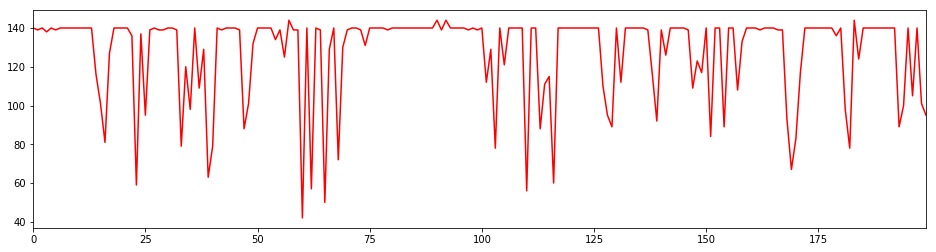

In [38]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

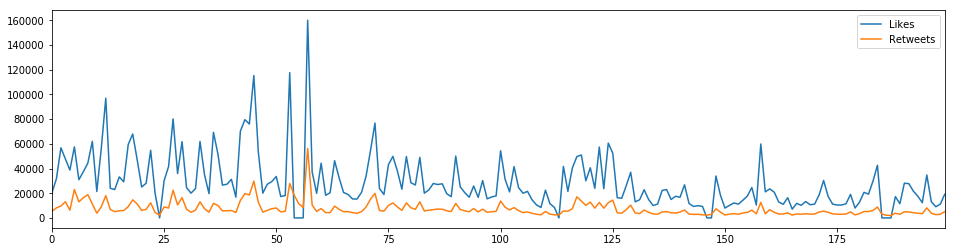

In [57]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [40]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Media Studio
* Twitter Web Client
* Periscope
* Twitter Ads Composer
* Twitter for Android


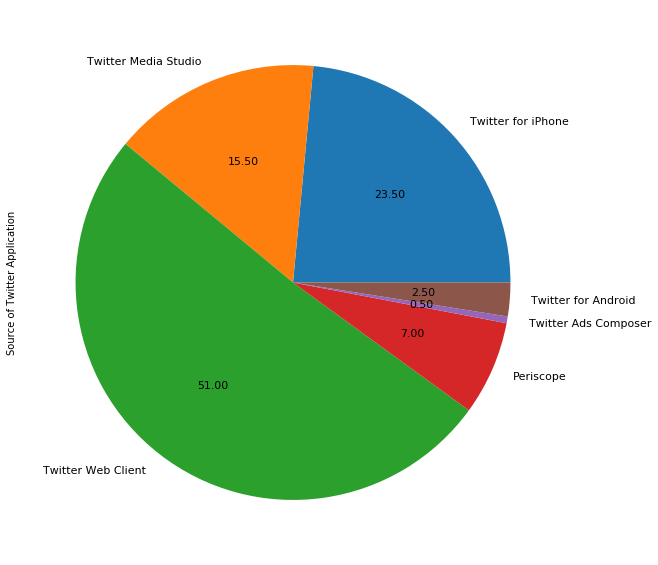

In [42]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100
 
# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Source of Twitter Application')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(10, 10));

In [64]:
from textblob import TextBlob
import re
 
def clean_tweet(tweet):
    '''
    yaha cleaning chal rhi hai
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       print ('Positive')
    elif analysis.sentiment[0]<0:
       print ('Negative')
    else:
       print ('Neutral')
    

Status(_api=<tweepy.api.API object at 0x0000014FA72992B0>, _json={'created_at': 'Fri Mar 22 12:29:47 +0000 2019', 'id': 1109069660182319105, 'id_str': '1109069660182319105', 'text': 'My condolences to the family and supporters of Karnataka Minister Shri CS Shivalli. \n\nShri Shivalli will be remembe… https://t.co/jOUR5kYP0O', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/jOUR5kYP0O', 'expanded_url': 'https://twitter.com/i/web/status/1109069660182319105', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Chowkidar Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'description': 'Prime Min

In [50]:
display(data.head(20))

,tweets,len,ID,Date,Source,Likes,RTs
0,Today they are betraying the principles of Dr....,140,1109306402395377665,2019-03-23 04:10:30,Twitter for iPhone,20262,5397
1,जो लोग आज डॉ. लोहिया के सिद्धांतों से छल कर रह...,139,1109306053429219329,2019-03-23 04:09:07,Twitter for iPhone,31827,8120
2,Greetings to @smritiirani Ji on her birthday. ...,140,1109274062063316992,2019-03-23 02:02:00,Twitter for iPhone,56765,9642
3,"आजादी के अमर सेनानी वीर भगत सिंह, सुखदेव और रा...",138,1109273202499436545,2019-03-23 01:58:35,Twitter Media Studio,47862,13159
4,My condolences to the family and supporters of...,140,1109069660182319105,2019-03-22 12:29:47,Twitter Web Client,38745,6256
5,Opposition insults our forces time and again.\...,139,1108965519082684416,2019-03-22 05:35:57,Twitter Web Client,57503,22999
6,Opposition is the natural habitat of terror ap...,140,1108965321434497024,2019-03-22 05:35:10,Twitter Web Client,30931,13033
7,Loyal courtier of Congress’ royal dynasty admi...,140,1108964963190628352,2019-03-22 05:33:45,Twitter Web Client,37428,16378
8,The most trusted advisor and guide of the Cong...,140,1108964730729689088,2019-03-22 05:32:50,Twitter Web Client,44415,18829
9,वीरों और महापुरुषों की धरती बिहार के निवासियों...,140,1108936425922150404,2019-03-22 03:40:21,Twitter for iPhone,61995,11272
